In [13]:
# from google.colab import drive
# drive.mount("/content/gdrive")
!pip install tensorflow

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:

# PATH = "./Rusantara-Dataset/Dataset/Dataset"

# train_dir = os.path.join(PATH, 'train')
# validation_dir = os.path.join(PATH, 'validation')

# BATCH_SIZE = 32
# IMG_SIZE = (160, 160)

# train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)

In [27]:
# validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
#                                                                  shuffle=True,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE)

In [29]:
train_data_dir = "./Rusantara-Dataset/rusantara2"

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1233 images belonging to 6 classes.
Found 305 images belonging to 6 classes.


In [3]:
# val_batches = tf.data.experimental.cardinality(validation_dataset)
# test_dataset = validation_dataset.take(val_batches // 5)
# validation_dataset = validation_dataset.skip(val_batches // 5)

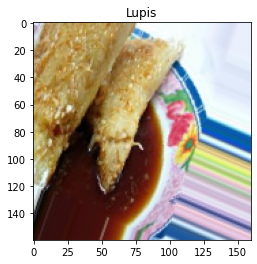

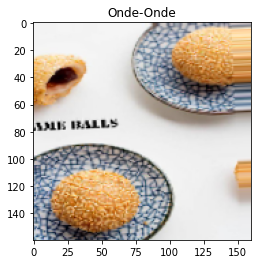

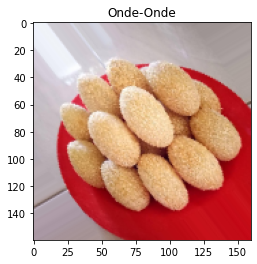

In [80]:
class_names = ["Dadar Gulung", "Kue Lemper", "Lapis Legit", "Lupis", "Onde-Onde", "Serabi"]

# plt.figure(figsize=(10, 10))
# for images, labels in train_generator.take(1):
#   for i in range(3):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")
    
# plt.figure(figsize=(15,15))
# for i in range(6):
#     plt.subplot(330 + 1 + i)
#     batch = train_generator.next()[0]*255
#     image = batch[0].astype('uint8')
#     plt.imshow(image)
# plt.show()

x,y = train_generator.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.title(class_names[int(label)])
    plt.imshow(image)
    plt.show()

# train_generator.classes()

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.2),
# ])

In [25]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [30]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

In [31]:
prediction_layer = tf.keras.layers.Dense(6)

In [32]:
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [33]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4096128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                           

In [35]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_generator)

10/10 [==============================] - 19s 1s/step - loss: 4.0165 - accuracy: 0.1672


In [36]:
history = model.fit(train_generator,
                    epochs=initial_epochs,
                    validation_data=validation_generator)

Epoch 1/10
39/39 [==============================] - 162s 4s/step - loss: 1.4034 - accuracy: 0.4972 - val_loss: 0.8301 - val_accuracy: 0.7410
Epoch 2/10
39/39 [==============================] - 143s 4s/step - loss: 0.7803 - accuracy: 0.7218 - val_loss: 0.5282 - val_accuracy: 0.8033
Epoch 3/10
39/39 [==============================] - 141s 4s/step - loss: 0.5463 - accuracy: 0.8037 - val_loss: 0.4406 - val_accuracy: 0.8754
Epoch 4/10
39/39 [==============================] - 133s 3s/step - loss: 0.4826 - accuracy: 0.8354 - val_loss: 0.3649 - val_accuracy: 0.8820
Epoch 5/10
39/39 [==============================] - 148s 4s/step - loss: 0.4528 - accuracy: 0.8256 - val_loss: 0.4481 - val_accuracy: 0.8623
Epoch 6/10
39/39 [==============================] - 129s 3s/step - loss: 0.3437 - accuracy: 0.8954 - val_loss: 0.2909 - val_accuracy: 0.9148
Epoch 7/10
39/39 [==============================] - 129s 3s/step - loss: 0.2963 - accuracy: 0.8978 - val_loss: 0.2983 - val_accuracy: 0.9082
Epoch 8/10
39

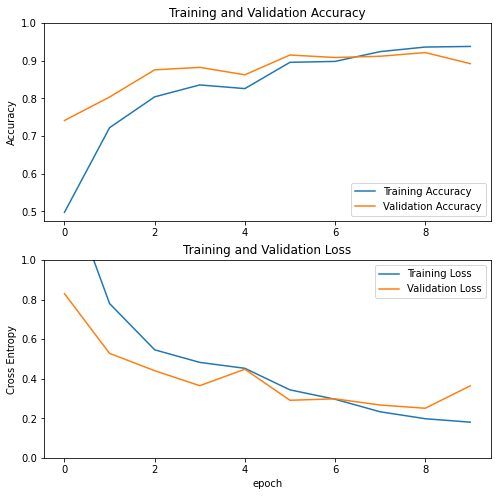

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [41]:
base_model.trainable = True

In [42]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [43]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4096128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                           

In [45]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator)

Epoch 10/20
39/39 [==============================] - 150s 3s/step - loss: 0.1112 - accuracy: 0.9586 - val_loss: 0.2276 - val_accuracy: 0.9344
Epoch 11/20
39/39 [==============================] - 88s 2s/step - loss: 0.0967 - accuracy: 0.9676 - val_loss: 0.2331 - val_accuracy: 0.9344
Epoch 12/20
39/39 [==============================] - 88s 2s/step - loss: 0.0981 - accuracy: 0.9643 - val_loss: 0.2105 - val_accuracy: 0.9344
Epoch 13/20
39/39 [==============================] - 82s 2s/step - loss: 0.0733 - accuracy: 0.9797 - val_loss: 0.2111 - val_accuracy: 0.9377
Epoch 14/20
39/39 [==============================] - 77s 2s/step - loss: 0.0687 - accuracy: 0.9757 - val_loss: 0.1288 - val_accuracy: 0.9639
Epoch 15/20
39/39 [==============================] - 76s 2s/step - loss: 0.0507 - accuracy: 0.9813 - val_loss: 0.2611 - val_accuracy: 0.9377
Epoch 16/20
39/39 [==============================] - 77s 2s/step - loss: 0.0567 - accuracy: 0.9789 - val_loss: 0.1961 - val_accuracy: 0.9377
Epoch 17/20


In [46]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

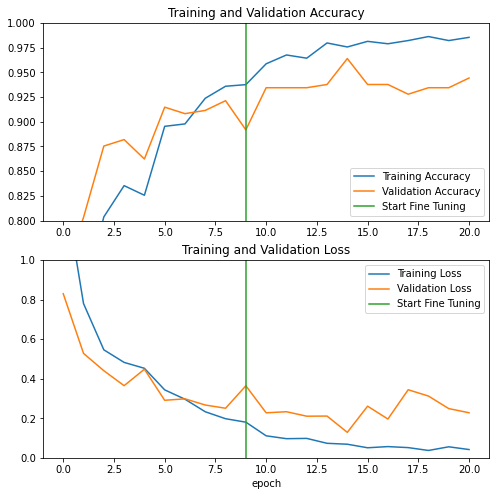

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

NameError: name 'test_dataset' is not defined

In [85]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img


path = "./Rusantara-Dataset/serabi35.jpeg"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = probability_model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

1/1 [==============================] - 0s 59ms/step
./Rusantara-Dataset/serabi35.jpeg
[[7.1226600e-07 2.8147264e-07 2.5363649e-06 4.3335635e-07 9.9957699e-01
  4.1905241e-04]]
Onde-Onde


In [73]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])